In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset= dataset['train'],dataset['test']

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples: {}'.format(num_train_examples))
print('Number of testing examples: {}'.format(num_test_examples))

Preprocess the data

In [ ]:
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images /=255
  return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

Plot image to see what it looks like

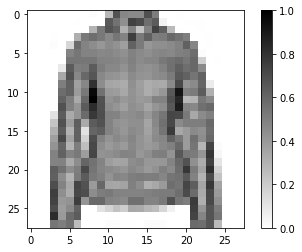

In [ ]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


Display the first 25 images from the training set

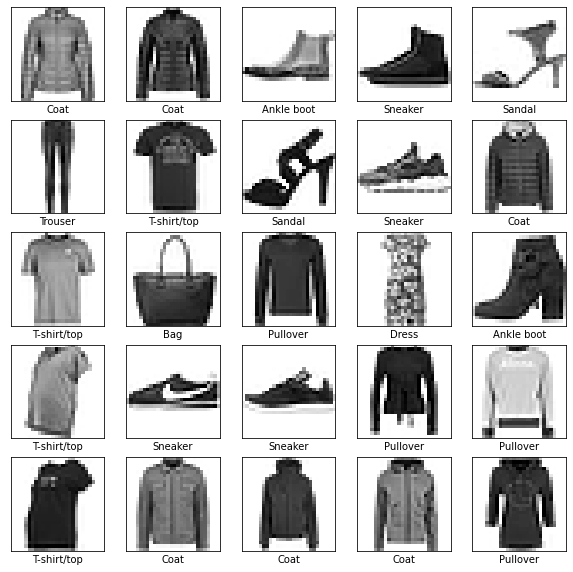

In [13]:
plt.figure(figsize=(10,10))
i=0
for(image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()  

**Setting up the layers**

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

**Compile the model**

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

**Train the model**

In [18]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [21]:
model.fit(train_dataset,epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 80s 39ms/step - loss: 0.3990 - accuracy: 0.8574
Epoch 2/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2556 - accuracy: 0.9070
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2136 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1841 - accuracy: 0.9325
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1588 - accuracy: 0.9415
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1350 - accuracy: 0.9489
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1147 - accuracy: 0.9570
Epoch 8/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0966 - accuracy: 0.9650
Epoch 9/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0816 - accuracy: 0.9699
Epoch 10/10
1875/1875 [==============================] - 74s 40m

**Evaluate accuracy**

In [22]:
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:',test_accuracy)

313/313 [==============================] - 6s 17ms/step - loss: 0.3166 - accuracy: 0.9191
Accuracy on test dataset: 0.9190999865531921


**Predictions**

In [23]:
for test_images, test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

In [24]:
predictions.shape

(32, 10)

In [25]:
predictions[0]

array([1.2383310e-09, 9.4590047e-10, 1.9792589e-05, 3.2981024e-11,
       9.8261398e-01, 8.8615781e-09, 1.7366247e-02, 6.7925277e-13,
       4.0618602e-11, 3.6524895e-08], dtype=float32)

In [26]:
np.argmax(predictions[0])

4

In [27]:
test_labels[0]

4

Graph to look at full set of 10 class predictions

In [28]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

0th predictions

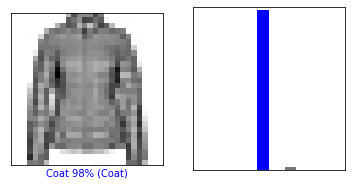

In [31]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

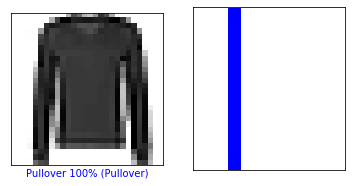

In [32]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

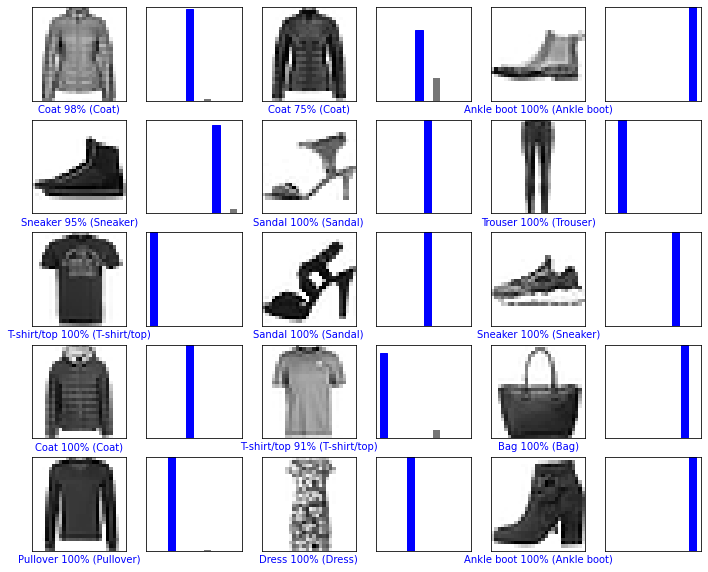

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [34]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [35]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2383310e-09 9.4590225e-10 1.9792571e-05 3.2981087e-11 9.8261398e-01
  8.8615781e-09 1.7366221e-02 6.7925277e-13 4.0618602e-11 3.6524828e-08]]


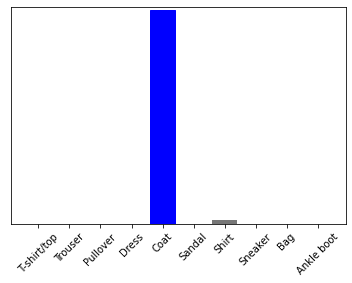

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

4